In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

DIR_TRAIN = os.getcwd() + "\\data\\train.csv"
DIR_TEST = os.getcwd() + "\\data\\test.csv"

test_names = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train_names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
               'Embarked']

In [2]:
def loadData(is_train, dir):
    if is_train:
        names = train_names
    else:
        names = test_names
    data = pd.read_csv(dir, header=0, names=names)
    return data

In [3]:
def splitData(datas, labels, splite):
    return train_test_split(datas, labels, test_size=splite, random_state=42)

In [4]:
data_train = loadData(is_train=True, dir=DIR_TRAIN)

In [5]:
data_test = loadData(is_train=False,dir=DIR_TEST)

In [6]:
x_train = data_train.drop(['PassengerId','Ticket','Survived','Cabin'],axis = 1)
y_train = data_train['Survived']

In [7]:
print(x_train.head())
print(y_train.head())

   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch     Fare Embarked  
0      1      0   7.2500        S  
1      1      0  71.2833        C  
2      0      0   7.9250        S  
3      1      0  53.1000        S  
4      0      0   8.0500        S  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [8]:
x_val = data_test.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [9]:
print(x_train.shape)
print(x_val.shape)
data = x_train.append(x_val)
print(data.shape)

(891, 8)
(418, 8)
(1309, 8)


In [10]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
data['Title'] = data['Name'].map(lambda x: x.split(', ')[1].split('.')[0])
data.sample(20)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
361,2,"del Carlo, Mr. Sebastiano",male,29.00,1,0,27.7208,C,Mr
241,2,"Christy, Mrs. (Alice Frances)",female,45.00,0,2,30.0000,S,Mrs
192,3,"van Billiard, Master. Walter John",male,11.50,1,1,14.5000,S,Master
122,2,"Nasser, Mr. Nicholas",male,32.50,1,0,30.0708,C,Mr
3,3,"Wirz, Mr. Albert",male,27.00,0,0,8.6625,S,Mr
287,1,"Snyder, Mr. John Pillsbury",male,24.00,1,0,82.2667,S,Mr
302,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,0.0000,S,Mr
145,2,"Nicholls, Mr. Joseph Charles",male,19.00,1,1,36.7500,S,Mr
394,3,"Kink-Heilmann, Mr. Anton",male,29.00,3,1,22.0250,S,Mr
423,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.00,1,1,14.4000,S,Mrs


In [12]:
data = data.drop('Name',axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [13]:
data['FamilySize'] = data['SibSp']+data['Parch']+1
data.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
224,1,male,38.0,1,0,90.0000,S,Mr,2
444,3,male,NaN,0,0,8.1125,S,Mr,1
102,1,male,21.0,0,1,77.2875,S,Mr,2
269,3,male,17.0,0,0,8.6625,S,Mr,1
414,3,male,44.0,0,0,7.9250,S,Mr,1
506,2,female,33.0,0,2,26.0000,S,Mrs,3
662,1,male,47.0,0,0,25.5875,S,Mr,1
94,1,male,25.0,0,0,26.0000,C,Mr,1
582,2,male,54.0,0,0,26.0000,S,Mr,1
37,3,male,21.0,0,0,8.0500,S,Mr,1


In [14]:
data['IsAlone'] = 1
data['IsAlone'].loc[data['FamilySize'] > 1] = 0
data.sample(10)

e:\anaconda3_5_0_0\envs\deeplearning\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
502,3,female,NaN,0,0,7.6292,Q,Miss,1,1
18,3,female,31.0,1,0,18.0000,S,Mrs,2,0
809,1,female,33.0,1,0,53.1000,S,Mrs,2,0
714,2,male,52.0,0,0,13.0000,S,Mr,1,1
734,2,male,23.0,0,0,13.0000,S,Mr,1,1
890,3,male,32.0,0,0,7.7500,Q,Mr,1,1
121,3,male,NaN,1,0,7.7500,Q,Mr,2,0
336,2,male,32.0,0,0,13.0000,S,Mr,1,1
203,2,female,8.0,1,1,26.0000,S,Miss,3,0
722,2,male,34.0,0,0,13.0000,S,Mr,1,1


In [15]:
print('-' *10)
print(x_train.isnull().sum())
print('-' *10)
print(x_val.isnull().sum())

----------
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
----------
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [16]:
print(data['Title'].value_counts())
#将Title小于10的变为Msic

title_names = (data['Title'].value_counts()<10)

data['Title'] = data['Title'].map(lambda x: 'Msic' if title_names.loc[x] == True else x)
data.sample(20)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Lady              1
Sir               1
Capt              1
Dona              1
the Countess      1
Mme               1
Jonkheer          1
Don               1
Name: Title, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
376,3,female,22.0,2,0,8.6625,S,Miss,3,0
9,3,male,21.0,2,0,24.1500,S,Mr,3,0
124,3,male,NaN,0,0,7.7500,Q,Mr,1,1
285,3,male,36.0,0,0,7.2500,S,Mr,1,1
640,3,male,20.0,0,0,7.8542,S,Mr,1,1
87,3,female,18.0,0,0,8.0500,S,Miss,1,1
265,2,male,36.0,0,0,10.5000,S,Mr,1,1
157,3,male,30.0,0,0,8.0500,S,Mr,1,1
382,3,female,NaN,0,0,14.5000,S,Mrs,1,1
286,3,male,NaN,0,0,7.2500,S,Mr,1,1


In [17]:
age_mean = data['Age'].mean()
fare_mean = data['Fare'].mean()
print('age mean : {}    fare mean : {}'.format(age_mean,fare_mean))

age mean : 29.881137667304014    fare mean : 33.29547928134557


In [18]:
#mode 泛数
data['Embarked'].mode()

0    S
dtype: object

In [19]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data = data.fillna({'Age':age_mean,'Fare':fare_mean})

In [20]:
print(data.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64


In [21]:
data['Embarked'] = pd.Categorical(data['Embarked'])
data['Embarked'] = data['Embarked'].cat.codes+1

data['Sex'] = pd.Categorical(data['Sex'])
data['Sex'] = data['Sex'].cat.codes+1

data['Title'] = pd.Categorical(data['Title'])
data['Title'] = data['Title'].cat.codes+1

In [22]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,2,22.0,1,0,7.2500,3,3,2,0
1,1,1,38.0,1,0,71.2833,1,4,2,0
2,3,1,26.0,0,0,7.9250,3,2,1,1
3,1,1,35.0,1,0,53.1000,3,4,2,0
4,3,2,35.0,0,0,8.0500,3,3,1,1


In [23]:
age_bin = [-1,0,5,12,18,25,35,60,120]
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
age_cat = pd.cut(data['Age'],bins=age_bin,labels=group_names)
data['Age'] = age_cat.cat.codes

In [24]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,2,4,1,0,7.2500,3,3,2,0
1,1,1,6,1,0,71.2833,1,4,2,0
2,3,1,5,0,0,7.9250,3,2,1,1
3,1,1,5,1,0,53.1000,3,4,2,0
4,3,2,5,0,0,8.0500,3,3,1,1


In [25]:
fare_bin = (-1, 0, 8, 15, 31, 1000)
group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
fare_cat = pd.cut(data['Fare'],bins=fare_bin,labels=group_names)
data['Fare'] = fare_cat.cat.codes
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,2,4,1,0,1,3,3,2,0
1,1,1,6,1,0,4,1,4,2,0
2,3,1,5,0,0,1,3,2,1,1
3,1,1,5,1,0,4,3,4,2,0
4,3,2,5,0,0,2,3,3,1,1


In [26]:
save_train = data.iloc[0:891].copy()
save_train['Survived'] = y_train
save_train.to_csv('./working/train.csv',index=False)
save_val = data.iloc[891:].copy()
save_val.to_csv('./working/test.csv',index=False)

In [27]:
def generator_data():
    x_train = pd.read_csv('./working/train.csv', header=0,)
    y_train = x_train.pop('Survived') 
    x_train,x_test,y_train,y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=33)
    
    y_train = np.asarray(y_train)
    x_train = np.asarray(x_train)

    y_test = np.asarray(y_test)
    y_train = np.asarray(y_train)
    
    return x_train,y_train,x_test,y_test

In [28]:
x_train_,y_train_,x_test_,y_test_ = generator_data()
x_train_

array([[3, 2, 5, ..., 3, 1, 1],
       [2, 1, 6, ..., 4, 3, 0],
       [3, 2, 4, ..., 3, 1, 1],
       ...,
       [2, 2, 4, ..., 3, 2, 0],
       [3, 2, 4, ..., 3, 1, 1],
       [2, 2, 5, ..., 3, 1, 1]], dtype=int64)

In [29]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform


def create_model(x_train,y_train,x_test,y_test):
    '''
    :return: keras model
    '''
    model = keras.models.Sequential()
    model.add(keras.layers.Dense({{choice([16,32,64,128])}}, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(keras.layers.Dropout({{uniform(0.1,0.8)}}))
    model.add(keras.layers.Dense({{choice([16,32,64,128])}}, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(keras.layers.Dropout({{uniform(0.1,0.8)}}))
    model.add(keras.layers.Dense({{choice([16,32,64,128])}}, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(keras.layers.Dropout({{uniform(0.1,0.8)}}))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
#     model.add(keras.layers.Dense(8, activation='relu'))
    model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])
    
    history = model.fit(x_train,y_train,batch_size=128,validation_data=[x_test,y_test],epochs=20)
    
    validation_acc = np.amax(history.history['val_binary_accuracy']) 
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

Using TensorFlow backend.


In [42]:
??optim.minimize

In [32]:
keras.backend.clear_session()

best_run, best_model = optim.minimize(model=create_model,
                                          data=generator_data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials(),notebook_name='titanic_v2')



>>> Imports:
#coding=utf-8

try:
    import os
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import tensorflow.keras as keras
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'Dense': hp.choice('Dense', [16,32,64,128]),
        'Dropout': hp.uniform('Dropout', 0.1,0.8),
        'Dense_1': hp.choice('Dense_1', [16,32,64,128]),
        'Dropout_1': hp.uniform('Dropout_1', 0.1,0.8),
        'Dense_2': hp.choice('Dense_2', [16,32,64,128]),
        'Dropout_2': hp.uniform('Dropout_2', 0.1,0.8),
    }

>>> Data
  1: 
  2: x_train = pd.read_csv('./worki

712/712 [==============================] - 0s 34us/step - loss: 1.1771 - binary_accuracy: 0.7528 - val_loss: 1.1087 - val_binary_accuracy: 0.7821
Epoch 16/20
712/712 [==============================] - 0s 35us/step - loss: 1.1192 - binary_accuracy: 0.7697 - val_loss: 1.0721 - val_binary_accuracy: 0.7765
Epoch 17/20
712/712 [==============================] - 0s 34us/step - loss: 1.1152 - binary_accuracy: 0.7500 - val_loss: 1.0611 - val_binary_accuracy: 0.7933
Epoch 18/20
712/712 [==============================] - 0s 35us/step - loss: 1.0571 - binary_accuracy: 0.7809 - val_loss: 1.0233 - val_binary_accuracy: 0.7933
Epoch 19/20
712/712 [==============================] - 0s 34us/step - loss: 1.0455 - binary_accuracy: 0.7570 - val_loss: 0.9811 - val_binary_accuracy: 0.7709
Epoch 20/20
712/712 [==============================] - 0s 35us/step - loss: 0.9993 - binary_accuracy: 0.7711 - val_loss: 0.9632 - val_binary_accuracy: 0.7933
Train on 712 samples, validate on 179 samples
Epoch 1/20
712/712

Epoch 6/20
712/712 [==============================] - 0s 34us/step - loss: 1.2437 - binary_accuracy: 0.7317 - val_loss: 1.2087 - val_binary_accuracy: 0.7263
Epoch 7/20
712/712 [==============================] - 0s 34us/step - loss: 1.2036 - binary_accuracy: 0.7303 - val_loss: 1.1769 - val_binary_accuracy: 0.7207
Epoch 8/20
712/712 [==============================] - 0s 34us/step - loss: 1.1691 - binary_accuracy: 0.7205 - val_loss: 1.1332 - val_binary_accuracy: 0.7430
Epoch 9/20
712/712 [==============================] - 0s 37us/step - loss: 1.1326 - binary_accuracy: 0.7416 - val_loss: 1.1120 - val_binary_accuracy: 0.7374
Epoch 10/20
712/712 [==============================] - 0s 35us/step - loss: 1.1032 - binary_accuracy: 0.7500 - val_loss: 1.0660 - val_binary_accuracy: 0.7318
Epoch 11/20
712/712 [==============================] - 0s 35us/step - loss: 1.0851 - binary_accuracy: 0.7303 - val_loss: 1.0463 - val_binary_accuracy: 0.7598
Epoch 12/20
712/712 [==============================] - 0

In [33]:
print("Evalutation of best performing model:")
print(best_model.evaluate(x_test_,y_test_))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:
179/179 [==============================] - 0s 90us/step
[0.9632478892470205, 0.7932960877205406]
Best performing model chosen hyper-parameters:
{'Dense': 3, 'Dense_1': 2, 'Dense_2': 2, 'Dropout': 0.6856666792981073, 'Dropout_1': 0.7389806128863993, 'Dropout_2': 0.3686662023008833}


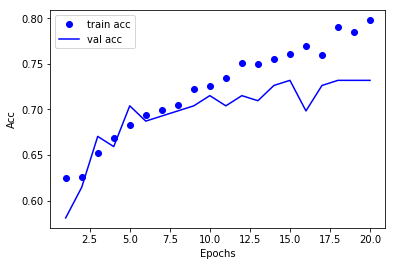

In [112]:
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epcho = range(1,len(train_acc)+1)

plt.plot(epcho,train_acc,'bo',label='train acc')
plt.plot(epcho,val_acc,'b',label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

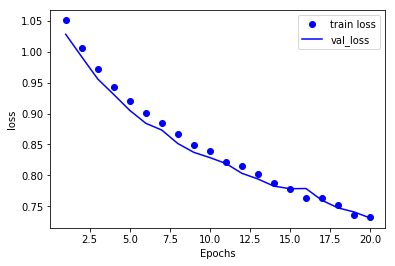

In [113]:
plt.clf()

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epcho = range(1,len(train_acc)+1)

plt.plot(epcho,train_loss,'bo',label='train loss')
plt.plot(epcho,val_loss,'b',label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [35]:
x_val = data.iloc[891:]
x_val = np.asarray(x_val)
x_val

array([[3, 2, 5, ..., 3, 1, 1],
       [3, 1, 6, ..., 4, 2, 0],
       [2, 2, 7, ..., 3, 1, 1],
       ...,
       [3, 2, 6, ..., 3, 1, 1],
       [3, 2, 5, ..., 3, 1, 1],
       [3, 2, 5, ..., 1, 3, 0]], dtype=int64)

In [36]:
predictions = best_model.predict_classes(x_val)

In [37]:
ids = data_test['PassengerId'].copy()
new_output = ids.to_frame()
new_output.head(10)

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [40]:
new_output['Survived'] = predictions
new_output.sample(10)

,PassengerId,Survived
207,1099,0
261,1153,0
231,1123,1
399,1291,0
172,1064,0
135,1027,0
178,1070,1
104,996,0
312,1204,0
236,1128,0


In [41]:
new_output.to_csv('./working/my_submit.csv',index=False)